#### 1. 문제 정의
- 미국의 도시인 보스턴의 1970년대 거주지에 대한 데이터를 바탕으로 주택가격을 예측하자.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### 2. 데이터 수집
- 보스턴 집 값 데이터셋 로드

In [7]:
data = pd.read_csv('./data/boston_house.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


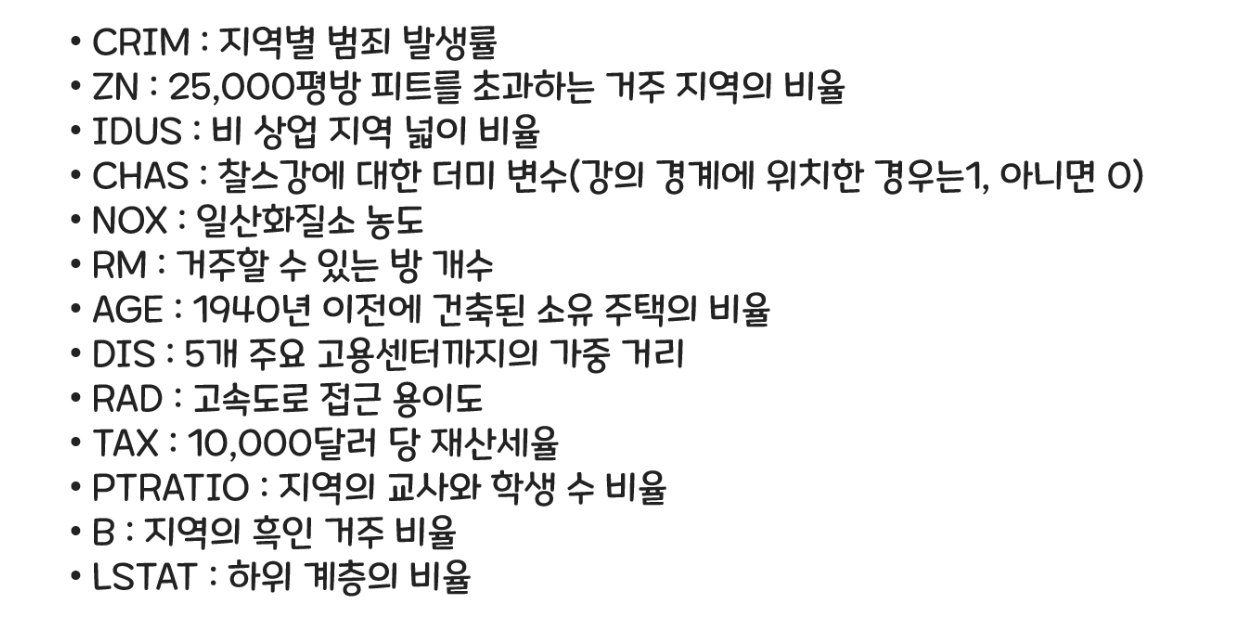

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### 3. 데이터 전처리
- 필요 없음

#### 4. 탐색적 데이터 분석

In [18]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


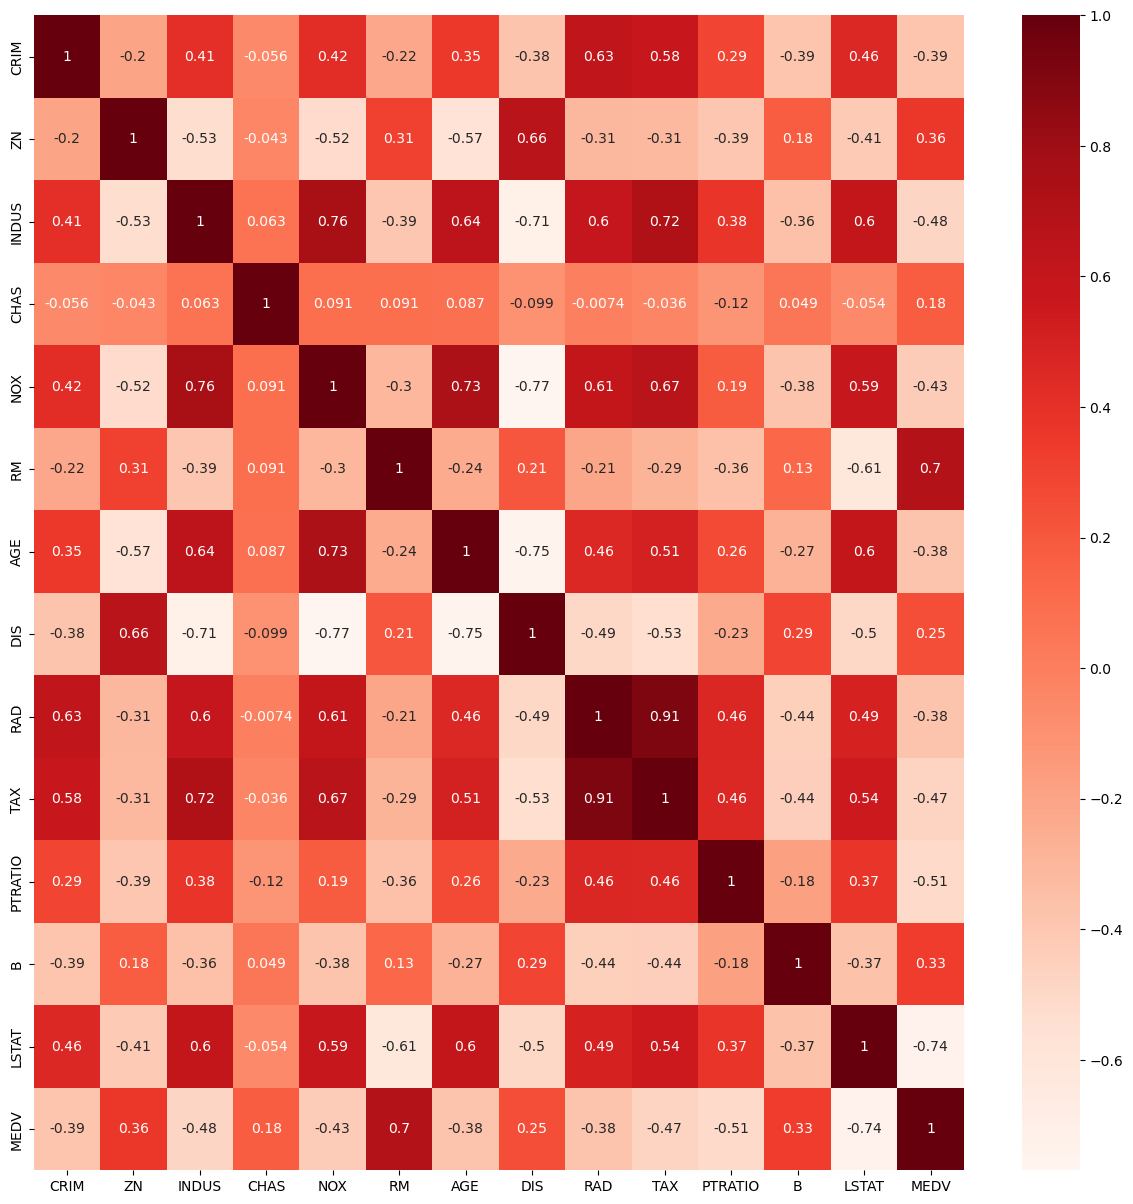

In [20]:
plt.figure(figsize=(15,15))

# 상관계수 히트맵
sns.heatmap(data = data.corr(),
           annot = True, # annotation : 각 셀에 상관계수 값 출력 여부
           cmap = 'Reds'
           )
plt.show()

- 데이터로만 보았을 때, 주택가격(MEDV)과의 상관관계가 높은 특성은 RM(주택당 방 개수), LSTAT(소득하위계층 비율)

#### 5. 모델링(모델 선택, 학습, 평가)
- 문제, 정답 데이터 설정
- 학습, 평가 데이터 설정

In [ ]:
# 문제, 정답으로 나눈 후, train_test_split으로 학습, 평가까지 분리

In [26]:
data.shape

(506, 14)

In [28]:
y = data['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [30]:
# X = data.drop('MEDV', axis = 1)
# X = data.iloc[:,:13]
X = data.loc[:,:'LSTAT']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [32]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=1)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


#### 선형회귀모델 적용

In [39]:
# 선형회귀모델 가져오기
from sklearn.linear_model import LinearRegression

# 평가지표 MSE
from sklearn.metrics import mean_squared_error

In [41]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [49]:
# 표기법 전환
np.set_printoptions(suppress=True, precision=4) # 지수표기법 억제, 소수점 4자리까지

In [51]:
# w 값 출력 (특성 13개)
linear_model.coef_

array([ -0.0985,   0.0608,   0.0592,   2.4396, -21.47  ,   2.7958,
         0.0036,  -1.5163,   0.3075,  -0.0113,  -1.0055,   0.0065,
        -0.5688])

In [61]:
# 데이터 프레임 화
coed_df = pd.DataFrame({ # 데이터 프레임 생성
    'Feature' : X_train.columns, # 컬럼명 : Feature, 데이터는 X_train.columns로 하겠다
    'Coefficient' : linear_model.coef_ # 컬럼명 : Coefficient, 데이터는 linear_model.coef_로 하겠다
})
coed_df

,Feature,Coefficient
0,CRIM,-0.098542
1,ZN,0.060784
2,INDUS,0.059172
3,CHAS,2.439560
4,NOX,-21.469965
5,RM,2.795814
6,AGE,0.003575
7,DIS,-1.516272
8,RAD,0.307542
9,TAX,-0.011280


- 왜 RM과 LSTAT의 가중치가 가장 크지 않을까?
- 독립변수의 들어가는 수치의 단위가 다르다 (스케일이 다름)
- ex) NOX:일산화 질소 농도 > 스케일이 매우 작음 > 기울기를 크게
- ex) Age의 경우 스케일이 크기 때문에 기울기를 작게

In [55]:
linear_model.intercept_

46.39649387182402

MSE,RMSE 확인

In [69]:
# 예측값 저장
pre_train = linear_model.predict(X_train)
pre_test = linear_model.predict(X_test)

In [79]:
train_mse = mean_squared_error(pre_train, y_train)
test_mse = mean_squared_error(pre_test, y_test)

print('train데이터의 MSE :',train_mse)
print('test데이터의 MSE :',test_mse)

train데이터의 MSE : 23.513334449327022
test데이터의 MSE : 19.831323672063103


R2 score 확인

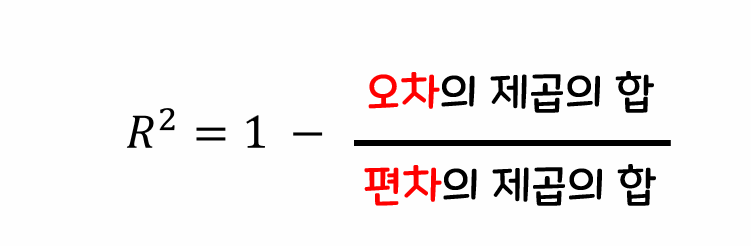

In [93]:
linear_model.score(X_train, y_train)

0.7103879080674731

In [97]:
linear_model.score(X_test, y_test)
# R2 score
# 0.7이상 : 좋은 모델
# 0.5 이상 : 조정 필요

0.7836295385076295

#### 선형회귀 모델 데이터 특성확장
- 선형회귀 모델은 데이터의 분포가 직선의 형태를 많이 벗어나게 되면 예측 정확도가 낮아짐
- 선형회귀 모델은 모델 튜닝을 위한 하이퍼파라미터가 존재하지 않음.
- 특성확장을 통해 성능을 높여보자

In [100]:
# copy() : 기존의 데이터는 그대로 두면서, 복사하여 새로운 변수명에 넣어줌
# copy() 없이 X_train을 새로운 변수에 담아준다면, 변수의 내용이 바뀌었을 때 기존 X_train도 바뀔 수 있음.

extended_X_train = X_train.copy()
extended_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,376.75,10.88


In [110]:
# 특성확장 진행
for col1 in X_train.columns: # 13번 반복
    for col2 in X_train.columns: # 13번 반복
        extended_X_train[col1+'x'+col2] = X_train[col1] * X_train[col2] # 169개의 새로운 열을 추가

In [104]:
extended_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,...,0.0,4.44388,49.13874,510.468,38.883950,33.04,2535.82,173.460,3278.3940,68.2276
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,...,0.0,6.54132,86.14904,1348.696,98.459140,115.52,4100.96,284.468,5459.4752,208.5136
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,...,0.0,14.25204,144.30456,2098.512,28.843920,509.76,14145.84,429.048,8430.1560,451.1376
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,...,0.0,1.84896,28.49040,94.176,23.332752,12.96,1088.64,79.056,1709.1216,18.6624
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,...,0.0,5.11216,25.35432,625.848,11.485984,170.88,4741.92,143.824,2525.4640,50.6944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,...,0.0,3.62600,54.35300,176.675,85.287775,9.25,2913.75,151.700,3655.4150,85.5625
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,...,0.0,2.27976,33.47880,43.056,29.185896,22.08,1683.60,105.984,2157.8232,30.4704
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,...,0.0,13.42341,124.06485,1859.520,32.479616,464.88,12900.42,391.274,7687.9530,375.1969
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,...,0.0,5.51616,66.21568,669.120,39.732672,87.04,3340.16,189.312,4099.0400,118.3744


In [106]:
extended_X_test = X_test.copy()

In [112]:
# 특성확장 진행
for col1 in X_test.columns: # 13번 반복
    for col2 in X_test.columns: # 13번 반복
        extended_X_test[col1+'x'+col2] = X_test[col1] * X_test[col2] # 169개의 새로운 열을 추가

In [114]:
extended_X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,...,0.0,3.55416,51.57297,529.359,23.965731,52.71,1671.66,138.552,2988.6570,56.7009
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,...,0.0,3.47512,48.07728,404.952,41.156478,35.90,2656.60,126.368,2849.7420,51.5524
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,...,0.0,8.42240,113.36400,1607.400,106.960720,56.40,4380.40,336.520,7383.5120,353.4400
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,...,0.0,3.31290,47.61180,173.340,52.633800,32.40,2794.50,153.090,3209.3010,65.6100
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,...,0.0,7.84630,54.63878,980.278,21.435684,244.56,6786.54,205.838,3880.2501,103.8361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,...,0.0,12.45088,127.98396,2014.740,54.159196,511.68,14199.12,430.664,7063.1028,454.5424
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,...,0.0,2.95925,44.05625,384.370,23.243080,13.30,1835.40,119.700,2380.5670,44.2225
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188,...,0.0,10.41733,106.88073,1665.697,37.418117,35.86,3370.84,342.463,6779.1537,321.4849
260,0.54011,20.0,3.97,0,0.647,7.203,81.8,2.1121,5,264,...,0.0,6.20473,69.07677,784.462,20.255039,47.95,2531.76,124.670,3766.9520,91.9681


In [116]:
# 특성확장된 train 데이터로 학습
linear_model2 = LinearRegression()
linear_model2.fit(extended_X_train,y_train)

LinearRegression()

In [124]:
linear_model2.score(extended_X_train,y_train) # 특성 확장전 : 0.71

0.9315216269307337

In [126]:
linear_model2.score(extended_X_test,y_test) # 특성 확장전 : 0.78

0.8043803931106108

#### 라쏘(Lasso) 모델 적용
- alpha 값으로 규제
- alpha 값이 높아지면, 규제가 강해지면서 과대적합의 위험이 적어짐, 오차는 커짐.

In [129]:
from sklearn.linear_model import Lasso

In [132]:
lasso_model = Lasso() # alpha의 default 값 : 1
lasso_model.fit(extended_X_train,y_train)

C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+03, tolerance: 2.874e+00
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [140]:
sum(lasso_model.coef_ != 0) 
# 182개의 특성 중 91개가 사라졌다.

91

In [146]:
lasso_model.score(extended_X_train,y_train) # 선형회귀의 경우 0.93

0.8657181959968749

In [150]:
lasso_model.score(extended_X_test,y_test) # 선형회귀의 경우 0.80 >> 과대적합 해소

0.8698528946654365

- train에서의 r2 스코어가 내려갔지만, test에서는 올랐다.
- 선형회귀 모델에서 과대적합이 줄어들었음을 확인했다.

#### 릿지(Ridge) 모델 적용

In [155]:
from sklearn.linear_model import Ridge

In [157]:
ridge_model = Ridge() # alpha의 default 값 : 1
ridge_model.fit(extended_X_train,y_train)

Ridge()

In [163]:
ridge_model.score(extended_X_train,y_train) # 선형회귀의 경우 0.93, Lasso = 0.86

0.9213754215513728

In [165]:
ridge_model.score(extended_X_test,y_test) # 선형회귀의 경우 0.80 Lasso = 0.86

0.8239994029608654

- alpha값이 1일 때 ,릿지모델에 비해 라쏘모델이 과대적합 해소에는 효과적이다.
- r2스코어도 높게 나온다.

#### 하이퍼파라미터 값 튜닝
- alpha 값을 바꿔가며 RMSE를 확인

In [169]:
# Lasso 모델
# alpha값에 따라 RMSE 계산값을 빈 리스트에 담아주기
alpha_list = [0.001,0.01,0.1,1,10,100]
lasso_train_list = []
lasso_test_list = []

for i in alpha_list:
    # alpha값을 변경하면서 Lasso모델 불러오기
    lasso_model = Lasso(alpha = i)
    lasso_model.fit(extended_X_train,y_train)

    # 예측값 구하기
    lasso_train_pre = lasso_model.predict(extended_X_train)
    # 예측값과 정답(실제값)을 이용해서 RMSE 추출
    lasso_train_RMSE = mean_squared_error(lasso_train_pre,y_train)**0.5
    # 빈 리스트에 RMSE 값 넣기
    lasso_train_list.append(lasso_train_RMSE)

    # test 데이터도 동일하게
    # 예측값 구하기
    lasso_test_pre = lasso_model.predict(extended_X_test)
    # 예측값과 정답(실제값)을 이용해서 RMSE 추출
    lasso_test_RMSE = mean_squared_error(lasso_test_pre,y_test)**0.5
    # 빈 리스트에 RMSE 값 넣기
    lasso_test_list.append(lasso_test_RMSE)

C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+03, tolerance: 2.874e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e+03, tolerance: 2.874e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.722e+03, tolerance: 2.874e+00

In [171]:
lasso_train_list

[2.57135461680513,
 2.668073188821743,
 2.9370910757701236,
 3.301850069018863,
 3.6589080485402636,
 4.471771163649593]

In [173]:
lasso_test_list

[3.810335859653293,
 3.5858825933874727,
 3.311933313070755,
 3.453775642282432,
 3.334441040358933,
 4.103129138236417]

In [175]:
# 한글을 쓰기 위한 rc import
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

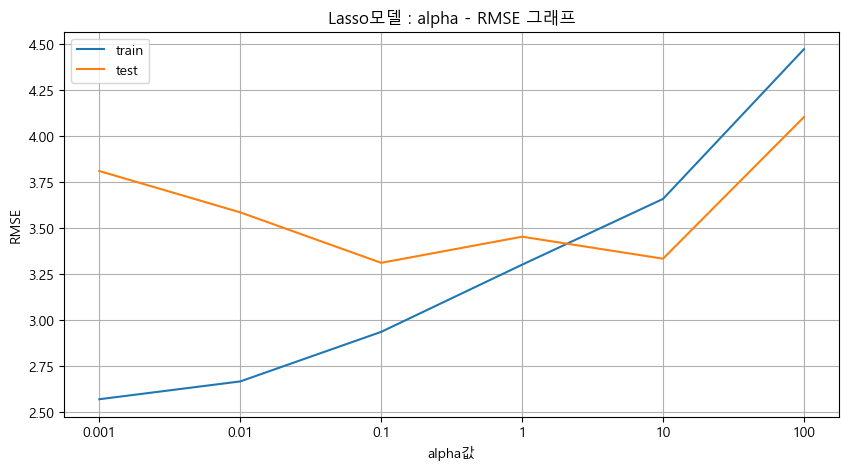

In [179]:
plt.figure(figsize=(10,5))
plt.plot(lasso_train_list, label='train') # train 그래프
plt.plot(lasso_test_list, label='test') # test 그래프
plt.title('Lasso모델 : alpha - RMSE 그래프') # 그래프 제목
plt.xlabel('alpha값') # x축 라벨
plt.xticks(np.arange(6), alpha_list) # x축 tick값(x축 값 개수, 실제 들어갈 값)
plt.ylabel('RMSE') # y축 라벨
plt.legend()
plt.grid()
plt.show()

In [186]:
# Ridge 모델
# alpha값에 따라 RMSE 계산값을 빈 리스트에 담아주기
alpha_list = [0.001,0.01,0.1,1,10,100]
ridge_train_list = []
ridge_test_list = []

for i in alpha_list:
    # alpha값을 변경하면서 Ridge모델 불러오기
    ridge_model = Ridge(alpha = i)
    ridge_model.fit(extended_X_train,y_train)

    # 예측값 구하기
    ridge_train_pre = ridge_model.predict(extended_X_train)
    # 예측값과 정답(실제값)을 이용해서 RMSE 추출
    ridge_train_RMSE = mean_squared_error(ridge_train_pre,y_train)**0.5
    # 빈 리스트에 RMSE 값 넣기
    ridge_train_list.append(ridge_train_RMSE)

    # test 데이터도 동일하게
    # 예측값 구하기
    ridge_test_pre = ridge_model.predict(extended_X_test)
    # 예측값과 정답(실제값)을 이용해서 RMSE 추출
    ridge_test_RMSE = mean_squared_error(ridge_test_pre,y_test)**0.5
    # 빈 리스트에 RMSE 값 넣기
    ridge_test_list.append(ridge_test_RMSE)

C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.26133e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


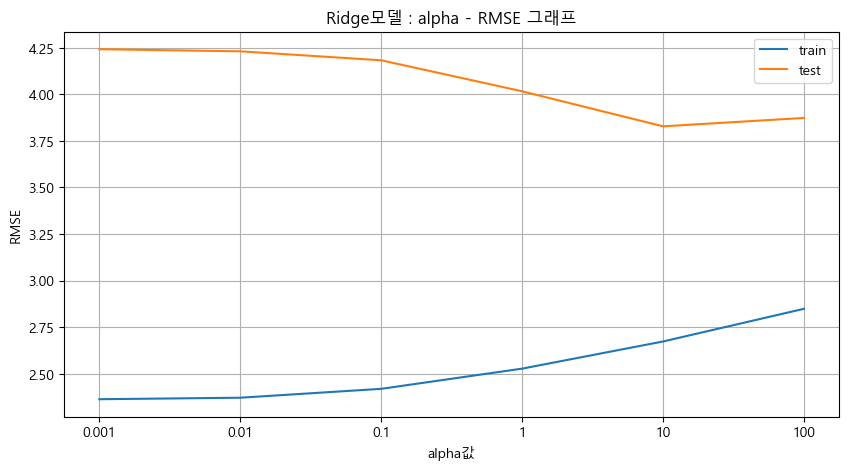

In [188]:
plt.figure(figsize=(10,5))
plt.plot(ridge_train_list, label='train') # train 그래프
plt.plot(ridge_test_list, label='test') # test 그래프
plt.title('Ridge모델 : alpha - RMSE 그래프') # 그래프 제목
plt.xlabel('alpha값') # x축 라벨
plt.xticks(np.arange(6), alpha_list) # x축 tick값(x축 값 개수, 실제 들어갈 값)
plt.ylabel('RMSE') # y축 라벨
plt.legend()
plt.grid()
plt.show()

#### 결론
- Lasso 모델과 Ridge 모델 모두 alpha값이 10일때 가장 과대적합 제어에 유리한것을 볼 수 있음
- Lasso 모델은 Ridge 모델에 비해, 과대적합 제어가 더 잘된것을 확인.
- 과대적합 제어를 위해서는 Lasso모델을 사용하는 것이 유리하다.
- 하지만 규제의 정도에 따라 Lasso모델은 오차값(RMSE)이 급격하게 증가한다.
- 모델의 정확한 예측(r2 score)면에서는 Ridge모델이 더 유리하다.